In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
zoo= pd.read_csv("zoo.csv")

In [0]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [0]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [0]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [0]:
zoo["class_type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

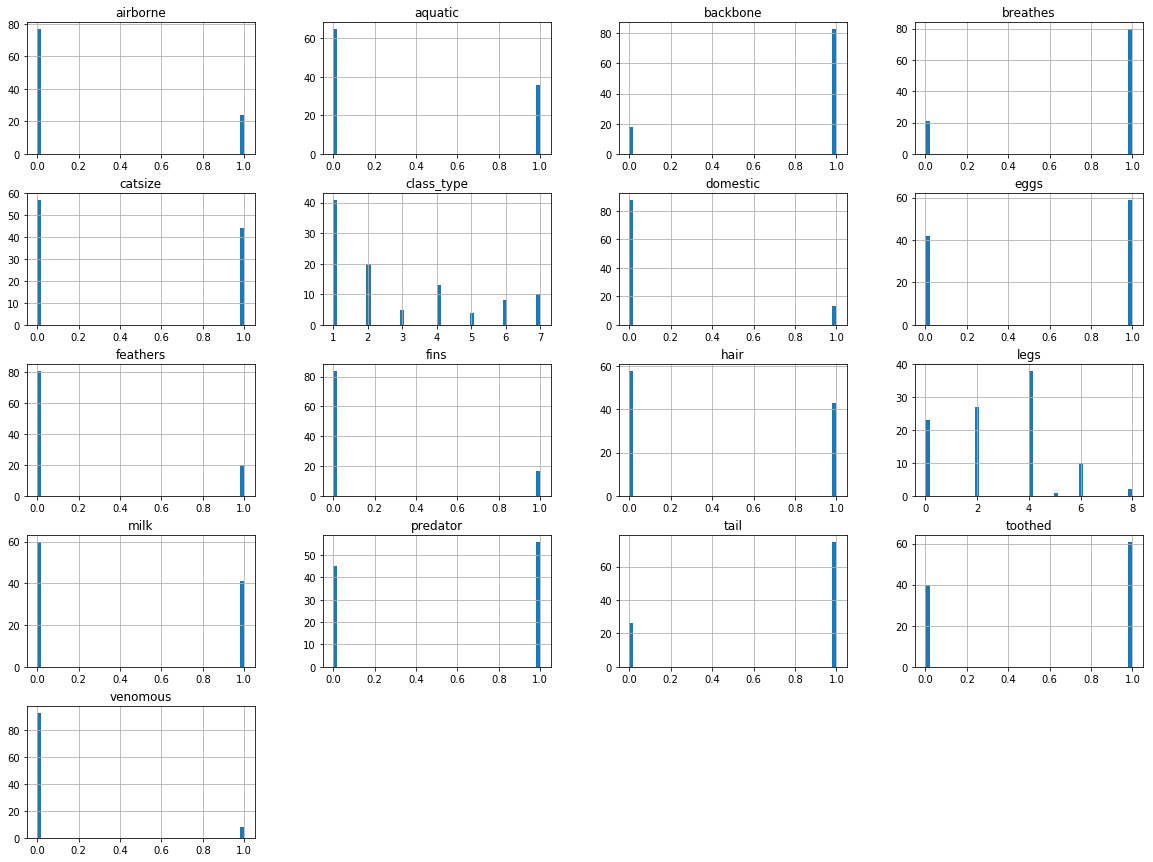

In [0]:
zoo.hist(bins=50, figsize=(20, 15))
plt.show()

In [0]:
train_set, test_set= train_test_split(zoo, test_size= 0.2, random_state= 42)

In [0]:
zoo=train_set.copy()

In [0]:
corr_matrix= zoo.corr()
corr_matrix["class_type"].sort_values(ascending= False)

class_type    1.000000
eggs          0.619803
aquatic       0.338046
venomous      0.200298
legs          0.162016
predator      0.122636
fins          0.095216
airborne     -0.080911
feathers     -0.238436
domestic     -0.263511
toothed      -0.405849
catsize      -0.492275
breathes     -0.530277
hair         -0.589818
tail         -0.605823
milk         -0.694440
backbone     -0.819172
Name: class_type, dtype: float64

In [0]:
train_set.drop("animal_name", axis= 1, inplace=True)

In [0]:
zoo=train_set.drop("class_type", axis=1)
zoo_labels= train_set["class_type"]

In [0]:
print(zoo.shape)
zoo_labels.shape

(80, 16)


(80,)

In [0]:
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0
42,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0
70,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0


In [0]:
svm_clf= Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
))
svm_clf.fit(zoo, zoo_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [0]:
cross_val_score(svm_clf, zoo, zoo_labels, cv=3, scoring= "accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y

array([0.96551724, 0.92592593, 1.        ])

In [0]:
y_pred= cross_val_predict(svm_clf, zoo, zoo_labels, cv=3)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y

In [0]:
confusion_matrix(zoo_labels, y_pred)

array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  0,  1,  8]])

In [0]:
precision_score(zoo_labels, y_pred, average=None)

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.75, 0.8 ])

In [0]:
recall_score(zoo_labels, y_pred, average=None)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.6       , 0.88888889])

In [0]:
f1_score(zoo_labels, y_pred, average="macro")

0.9298245614035087

In [0]:
poly_clf= Pipeline((
("scaler", StandardScaler()),
("linear_svc", SVC(kernel= "poly", C=5, coef0=1, degree=3)),
))
poly_clf.fit(zoo, zoo_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [0]:
y_pred_poly= cross_val_predict(poly_clf, zoo, zoo_labels, cv=3)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y

In [0]:
precision_score(zoo_labels, y_pred_poly, average=None)

array([1.  , 1.  , 0.8 , 1.  , 1.  , 0.75, 0.8 ])

In [0]:
confusion_matrix(zoo_labels, y_pred_poly)

array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  1,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  0,  1,  8]])

In [0]:
rbf_clf=Pipeline((
('scaler', StandardScaler()),
('svm_clf', SVC(kernel="rbf", gamma=5, C=0.001)),
))
rbf_clf.fit(zoo, zoo_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [0]:
y_pred_rbf=cross_val_predict(rbf_clf, zoo, zoo_labels, cv=3)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y

In [0]:
confusion_matrix(zoo_labels, y_pred_rbf)

array([[29,  0,  0,  0,  0,  0,  0],
       [18,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0],
       [11,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0]])

In [0]:
precision_score(zoo_labels, y_pred_rbf, average=None)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.3625, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ])

In [0]:
rnd_clf= RandomForestClassifier(n_estimators= 500, max_leaf_nodes=10)

In [0]:
rnd_clf.fit(zoo, zoo_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
y_pred_rnd= cross_val_predict(rnd_clf,zoo , zoo_labels, cv=3)

In [0]:
confusion_matrix(zoo_labels, y_pred_rnd)

array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  0,  1,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  1,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  0,  1,  8]])

In [0]:
tree_clf= DecisionTreeClassifier(max_depth= 25)


In [0]:
y_pred_tree= cross_val_predict(tree_clf, zoo, zoo_labels, cv=3)

In [0]:
confusion_matrix(zoo_labels, y_pred_tree)

array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  1,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  1,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  0,  0,  0,  9]])

In [0]:
ada_clf= AdaBoostClassifier(tree_clf, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)

In [0]:
y_pred_ada= cross_val_predict(ada_clf, zoo, zoo_labels, cv=3)

In [0]:
confusion_matrix(zoo_labels, y_pred_ada)

array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  0,  1,  8]])

In [0]:
test_set.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0,1
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
66,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
45,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [0]:
test_set.drop("animal_name", axis=1, inplace=True)

KeyError: ignored

In [0]:
zoo_test=test_set.drop("class_type", axis=1)
zoo_labels_test= test_set["class_type"]

In [0]:
y_pred_test=svm_clf.predict(zoo_test)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [0]:
confusion_matrix(zoo_labels_test, y_pred_test)

array([[12,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1]])

In [0]:
f1_score(zoo_labels_test, y_pred_test, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7777777777777778